In [6]:
import numpy as np
import matplotlib.pyplot as plt
import ot

# for 3d plot
from mpl_toolkits.mplot3d import Axes3D  # noqa
from matplotlib.collections import PolyCollection

In [18]:
n = 100  # nb bins

# bin positions
x = np.arange(n, dtype=np.float64)

# Gaussian distributions
a1 = ot.datasets.make_1D_gauss(n, m=20, s=5)  # m= mean, s= std
a2 = 0.5*ot.datasets.make_1D_gauss(n, m=60, s=8) + 0.5*ot.datasets.make_1D_gauss(n, m=80, s=10)

In [ ]:
# creating matrix A containing all distributions
A = np.vstack((a1, a2)).T
n_distributions = A.shape[1]

# loss matrix + normalization
M = ot.utils.dist0(n) # matrice de coût pour n points à intervalle régulier
# ot.dist(x[:, None], y[:, None]) # définition classique de la matrice de coût
M /= M.max()

0.2586658141509189


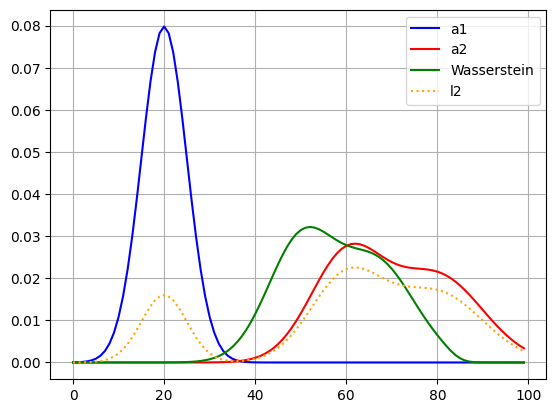

In [25]:
alpha = 0.8  # 0<=alpha<=1
weights = np.array([1 - alpha, alpha])

# l2bary
bary_l2 = A.dot(weights)

# wasserstein
reg = 1e-3
bary_wass = ot.bregman.barycenter(A, M, reg, weights)

# distance
distance = ot.emd2(a1, a2, M)
print(distance)

# Affichage
plt.plot(x, a1, label='a1', color='blue')
plt.plot(x, a2, label='a2', color='red')
plt.plot(x, bary_wass, label='Wasserstein', color='green')
plt.plot(x, bary_l2, label='l2', color='orange', linestyle=':')

plt.legend()
plt.grid(True)
plt.show()

In [35]:
x = np.linspace(0, 2, n)  # support dans [0, 2]

a3 = np.where((x >= 0) & (x <= 1), 1, 0)
a3 = a3 / a3.sum()  # normalisation

a4 = np.where((x >= 0.1) & (x <= 1.1), 1, 0)
a4 = a4 / a4.sum()  # normalisation

a5 = np.where((x >= 0) & (x <= 0.9), 1, 0) + np.where((x >= 1) & (x <= 1.1), 1, 0)
a5 = a5 / a5.sum()  # normalisation

# loss matrix + normalization
M = ot.utils.dist0(n)
M /= M.max()

# distances
distance1 = ot.emd2(a3, a4, M)
print(distance1)

distance2 = ot.emd2(a3, a5, M)
print(distance2)

0.0025507601265177026
0.0002550760126517702


les valeurs obtenues sont les distance de wasserstein mais à un facteur près (à cause de la définition de la matrice de coût). On peut tout de même les comparer.

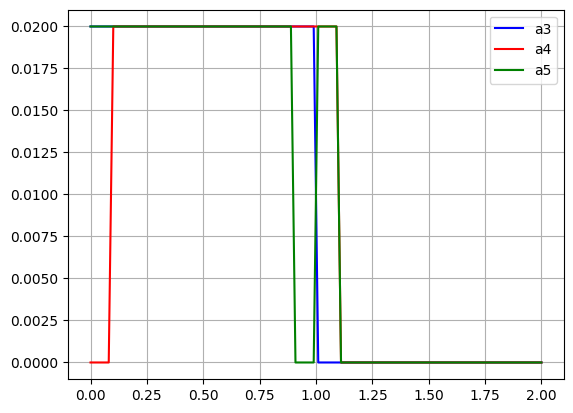

In [33]:
plt.plot(x, a3, label='a3', color='blue')
plt.plot(x, a4, label='a4', color='red')
plt.plot(x, a5, label='a5', color='green')

plt.legend()
plt.grid(True)
plt.show()

La distribution verte est "plus proche" de la distribution rouge que l'est la distribution bleue. Ce qui est un peu contre intuitif puisque la distribution bleue est une translation de la rouge alors que la distribution verte est différente.